<a href="https://colab.research.google.com/github/nandinisitlani2/Tensorflow-Essentials/blob/main/transferLearning_FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing previously created helper function

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-02 12:09:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-02 12:09:59 (87.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-05-02 12:10:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   226MB/s    in 0.7s    

2023-05-02 12:10:04 (226 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data("10_food_classes_10_percent.zip")

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/gr

In [6]:
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [7]:
import tensorflow as tf
IMG_size=(224,224)
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                               image_size=IMG_size,
                                                               batch_size=32,
                                                               label_mode="categorical")
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                               image_size=IMG_size,
                                                               batch_size=32,
                                                               label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
for images, labels in train_data.take(1):
 print(images,labels)

tf.Tensor(
[[[[ 21.         21.         19.       ]
   [ 21.85491    21.85491    19.85491  ]
   [ 22.         22.         20.       ]
   ...
   [ 25.816824   33.816822   36.816822 ]
   [ 27.061077   34.061077   40.061077 ]
   [ 27.85491    34.85491    40.85491  ]]

  [[ 20.844547   20.844547   18.844547 ]
   [ 21.         21.         19.       ]
   [ 21.564732   21.564732   19.564732 ]
   ...
   [ 26.435268   34.43527    37.43527  ]
   [ 26.16056    33.59583    38.290024 ]
   [ 26.7202     33.7202     39.7202   ]]

  [[ 20.176498   20.176498   18.176498 ]
   [ 20.948183   20.948183   18.948183 ]
   [ 21.         21.         19.       ]
   ...
   [ 26.42999    34.42999    37.42999  ]
   [ 25.071442   33.07144    36.07144  ]
   [ 27.082624   34.082623   40.082623 ]]

  ...

  [[ 17.450928   16.450928   12.450928 ]
   [ 16.777283   15.777283   11.777283 ]
   [ 16.         15.         11.       ]
   ...
   [155.01837   173.80411   177.37558  ]
   [161.78322   182.99754   185.9261   ]
   [1

In [10]:
model_1=tf.keras.applications.EfficientNetB0(include_top=False,
                                             )
model_1.trainable=False
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
# we would have to rescale inputs if we were using resnet50


x=model_1(inputs)
print(f"shape after input:{x.shape}")
x=tf.keras.layers.GlobalAveragePooling2D(name="pooling_layer")(x)
print(f"shape after pooling:{x.shape}")
outputs=tf.keras.layers.Dense(10,activation="softmax",name="output")(x)

model_0=tf.keras.Model(inputs,outputs)

16705208/16705208 [==============================] - 1s 0us/step
shape after input:(None, 7, 7, 1280)
shape after pooling:(None, 1280)


In [11]:
model_0.compile(loss="categorical_crossentropy",
                optimizer="adam",
               metrics=["accuracy"])

In [12]:
#history**lol
hostory_0=model_0.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=(0.25*len(test_data)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="feature_extraction")])



Saving TensorBoard log files to: transfer_learning/feature_extraction/20230502-121015


Epoch 1/5
24/24 [==============================] - 29s 237ms/step - loss: 1.8456 - accuracy: 0.4560 - val_loss: 1.2795 - val_accuracy: 0.7391
Epoch 2/5
24/24 [==============================] - 5s 174ms/step - loss: 1.0692 - accuracy: 0.7653 - val_loss: 0.8297 - val_accuracy: 0.8406
Epoch 3/5
24/24 [==============================] - 5s 174ms/step - loss: 0.7858 - accuracy: 0.8227 - val_loss: 0.6720 - val_accuracy: 0.8609
Epoch 4/5
24/24 [==============================] - 5s 176ms/step - loss: 0.6361 - accuracy: 0.8613 - val_loss: 0.5923 - val_accuracy: 0.8531
Epoch 5/5
24/24 [==============================] - 5s 205ms/step - loss: 0.5384 - accuracy: 0.8853 - val_loss: 0.5667 - val_accuracy: 0.8516


In [13]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.5493 - accuracy: 0.8592


[0.5493478775024414, 0.8592000007629395]

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output (Dense)              (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


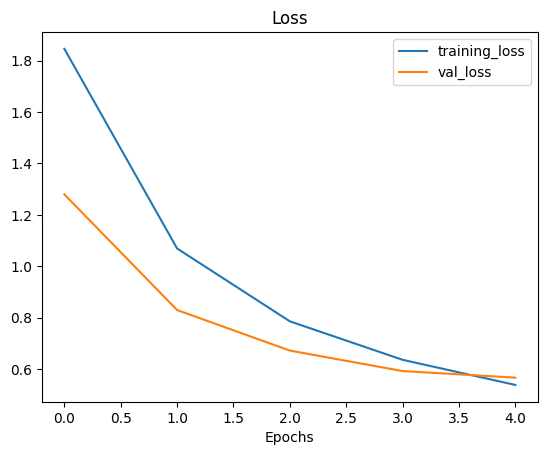

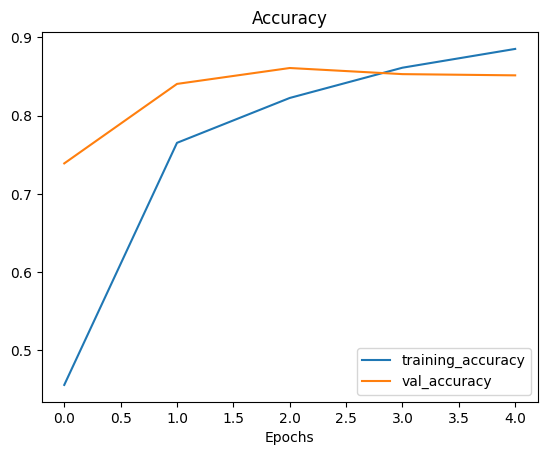

In [15]:
plot_loss_curves(hostory_0)

In [16]:
input_shape=(1,4,4,3)
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
print(f"input tensor :{input_tensor}")

input tensor :[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]


In [17]:
global_average_pool_tensor=tf.keras.layers.GlobalAvgPool2D()(input_tensor)
print(f"global pooled tensor:{global_average_pool_tensor}")

global pooled tensor:[[-0.09368646 -0.45840448 -0.2885598 ]]


In [18]:
# removes the middle dimensions by averging over the axises

tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [19]:
global_max_pool_tensor=tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"global max pooled tensor:{global_max_pool_tensor}")

global max pooled tensor:[[0.9058464 1.1603122 1.6994323]]


In [20]:
tf.reduce_max(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

In [21]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-05-02 12:11:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 142.251.167.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   217MB/s    in 0.6s    

2023-05-02 12:11:16 (217 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent="10_food_classes_1_percent/train"
test_dir="10_food_classes_1_percent/test"

In [23]:
walk_through_dir(train_dir_1_percent)

There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.


In [24]:
IMG_SIZE=(224,224)
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                               image_size=IMG_size,
                                                               batch_size=32,
                                                               label_mode="categorical")
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                               image_size=IMG_size,
                                                               batch_size=32,
                                                               label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [26]:
data_augmentation=keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
],
name="data_augmentation"
)


In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import random

10_food_classes_1_percent/train/chicken_curry/2516795.jpg


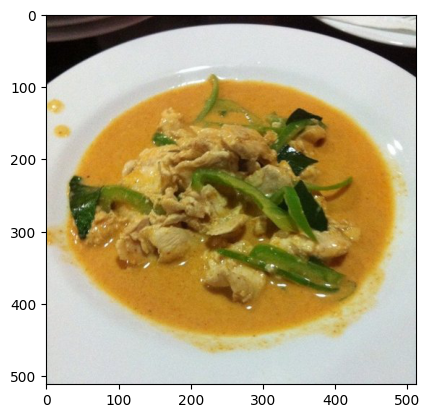

In [28]:
random_class=random.choice(train_data.class_names)
random_dir=train_dir_1_percent + "/" + random_class
random_image=random.choice(os.listdir(random_dir))
print(random_dir +"/" + random_image)
img=mpimg.imread(random_dir +"/" + random_image)
plt.imshow(img)




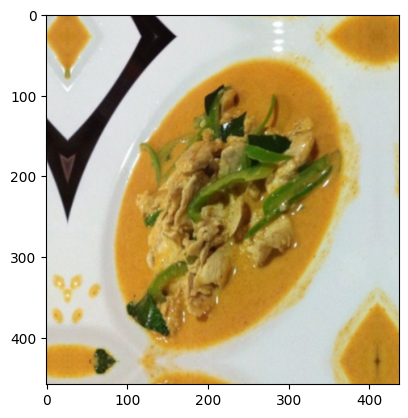

In [29]:
augmented_img_=data_augmentation(tf.expand_dims(img,axis=0))
plt.imshow(tf.squeeze(augmented_img_/255))

## Model 1 on 1% data with data augmentation

In [30]:
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=layers.Input(shape=input_shape)

x=data_augmentation(inputs)

x=base_model(x,training=False)

x=tf.keras.layers.GlobalAveragePooling2D()(x)

outputs=layers.Dense(10,activation="softmax")(x)

model_1=keras.Model(inputs,outputs)


model_1.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])
 

history_1_percent = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=(0.25*len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="exp",experiment_name="1%")])


Saving TensorBoard log files to: exp/1%/20230502-121122
Epoch 1/5
3/3 [==============================] - 13s 2s/step - loss: 2.3012 - accuracy: 0.1429 - val_loss: 2.2667 - val_accuracy: 0.1516
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.0546 - accuracy: 0.3143 - val_loss: 2.1568 - val_accuracy: 0.2047
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9243 - accuracy: 0.3429 - val_loss: 2.0621 - val_accuracy: 0.2391
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7364 - accuracy: 0.5143 - val_loss: 1.9668 - val_accuracy: 0.2984
Epoch 5/5
3/3 [==============================] - 6s 3s/step - loss: 1.5953 - accuracy: 0.6857 - val_loss: 1.8688 - val_accuracy: 0.3734


In [ ]:
model_1.summary()

In [ ]:
plot_loss_curves(history_1_percent)

In [ ]:
results_1_percent=model_1.evaluate(test_data)

## Model 2 with feature extraction with 10% data

In [ ]:
train_dir_10_percent="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf

train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE,
                                                                          )
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE,
                                                                          )

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation=Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.3),
    preprocessing.RandomRotation(0.2)
],name="data_augmentation")

In [ ]:
input_shape=(224,224,3)

base_model=tf.keras.applications.EfficientNetB0(include_top=False
                                                )
base_model.trainable=False

inputs=layers.Input(shape=input_shape)

x=data_augmentation(inputs)

x=base_model(x,training=False)

x=layers.GlobalAveragePooling2D()(x)

outputs=layers.Dense(10,activation="softmax")(x)

model_2=tf.keras.Model(inputs,outputs)


model_2.compile(loss="categorical_crossentropy",
                
               
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2=model_2.fit(train_data_10_percent,
            epochs=5,
            
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            
            )

## model checkpoint callback

In [ ]:
checkpoint_path="10_percent_model_weights/checkpoint.ckpt"

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_best_only=False,
                                                       save_weights_only=False,
                                                       save_freq="epoch",
                                                       include_optimizer=False,
                                                       verbose=1)

In [ ]:
plot_loss_curves(history_2)

In [ ]:
len(model_2.layers[2].trainable_variables)

In [ ]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False


model_2.compile(loss="categorical_crossentropy",
                # lowering lr since we are unfreezing layers 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])




In [ ]:
len(model_2.layers[2].trainable_variables)

In [44]:
history_10_percent_fine_tune=model_2.fit(train_data_10_percent,
            epochs=10,
            
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            initial_epoch=history_2.epoch[-1]
            )

Epoch 5/10
24/24 [==============================] - 11s 431ms/step - loss: 0.3643 - accuracy: 0.8933 - val_loss: 0.3248 - val_accuracy: 0.8816
Epoch 6/10
24/24 [==============================] - 12s 472ms/step - loss: 0.2597 - accuracy: 0.9120 - val_loss: 0.3927 - val_accuracy: 0.8569
Epoch 7/10
24/24 [==============================] - 10s 413ms/step - loss: 0.1913 - accuracy: 0.9333 - val_loss: 0.4414 - val_accuracy: 0.8503
Epoch 8/10
24/24 [==============================] - 9s 350ms/step - loss: 0.1600 - accuracy: 0.9520 - val_loss: 0.4273 - val_accuracy: 0.8569
Epoch 9/10
24/24 [==============================] - 9s 350ms/step - loss: 0.1498 - accuracy: 0.9493 - val_loss: 0.5087 - val_accuracy: 0.8273
Epoch 10/10
24/24 [==============================] - 9s 344ms/step - loss: 0.1213 - accuracy: 0.9640 - val_loss: 0.3939 - val_accuracy: 0.8734


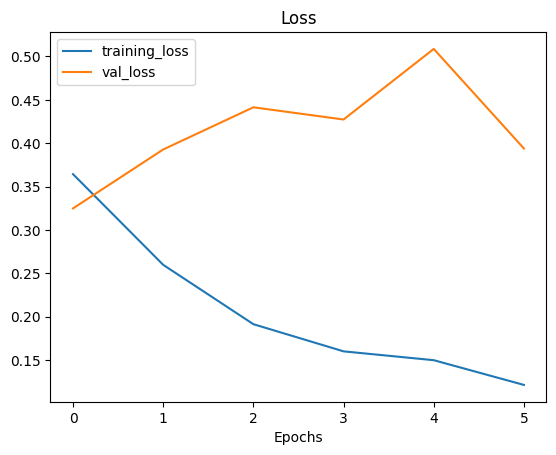

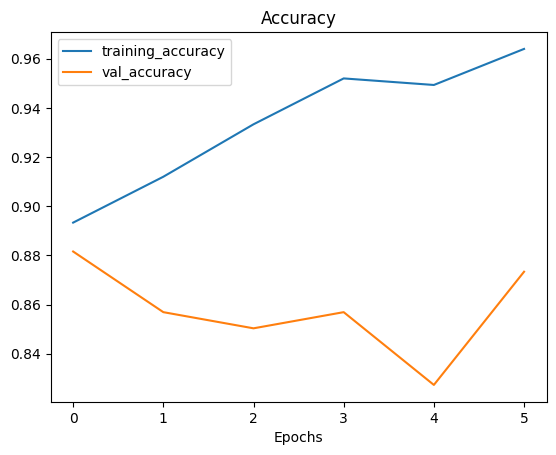

In [45]:
plot_loss_curves(history_10_percent_fine_tune)

In [64]:
def compare_history(history,fine_tune_history,epochs=5):
  acc=history.history["accuracy"]
  loss=history.history["loss"]
  val_acc=history.history["val_accuracy"]
  val_loss=history.history["val_loss"]

  total_accuracy=acc+fine_tune_history.history["accuracy"]
  total_loss=loss+fine_tune_history.history["loss"]
  total_val_accuracy=val_acc+fine_tune_history.history["val_accuracy"]
  total_val_loss=val_loss+fine_tune_history.history["val_loss"]


  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_accuracy,label="total_accuracy")
  plt.plot(total_val_accuracy,label="total_val_ccuracy")
  plt.plot([epochs,epochs],plt.ylim(),label="start_fine_tune")
  plt.legend()
  plt.title("validation and training accuracy")

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label="total_loss")
  plt.plot(total_val_loss,label="total_val_loss")
  plt.plot([epochs,epochs],plt.ylim(),label="start_fine_tune")
  plt.legend()
  plt.title("validation and training loss")

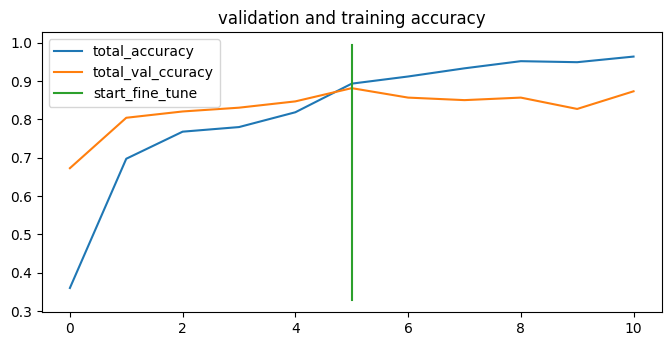

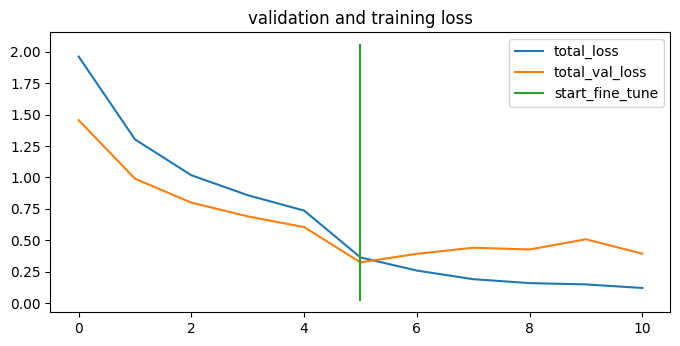

In [65]:
compare_history(history_2,history_10_percent_fine_tune)

In [66]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-05-02 13:26:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  63.7MB/s    in 6.6s    

2023-05-02 13:26:31 (74.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [68]:
unzip_data("10_food_classes_all_data.zip")

In [69]:
walk_through_dir("10_food_classes_all_data/train")

There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.


In [70]:
train_data_all_dir="10_food_classes_all_data/train"
test_data_all_dir="10_food_classes_all_data/train"

In [71]:
IMG_SIZE=(224,224)

train_data_all=tf.keras.preprocessing.image_dataset_from_directory(train_data_all_dir,
                                                                   image_size=IMG_SIZE,
                                                                   label_mode="categorical")

Found 7500 files belonging to 10 classes.


In [73]:
for layer_number ,layer in enumerate(model_2.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_5 True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling2d_2 True
4 dense_1 True


In [75]:
for layer_number ,layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_4 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [76]:
model_2.compile(loss="categorical_crossentropy",
                # lowering lr since we are unfreezing layers 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])



In [78]:
history_full=model_2.fit(train_data_all,
            epochs=10,
            
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            initial_epoch=history_2.epoch[-1]
            )

Epoch 5/10
235/235 [==============================] - 59s 248ms/step - loss: 0.4229 - accuracy: 0.8611 - val_loss: 0.2580 - val_accuracy: 0.9194
Epoch 6/10
235/235 [==============================] - 65s 276ms/step - loss: 0.3473 - accuracy: 0.8833 - val_loss: 0.2095 - val_accuracy: 0.9243
Epoch 7/10
235/235 [==============================] - 46s 195ms/step - loss: 0.2981 - accuracy: 0.9013 - val_loss: 0.2793 - val_accuracy: 0.9079
Epoch 8/10
235/235 [==============================] - 43s 180ms/step - loss: 0.2499 - accuracy: 0.9157 - val_loss: 0.2613 - val_accuracy: 0.9211
Epoch 9/10
235/235 [==============================] - 43s 180ms/step - loss: 0.2276 - accuracy: 0.9253 - val_loss: 0.2687 - val_accuracy: 0.9211
Epoch 10/10
235/235 [==============================] - 41s 170ms/step - loss: 0.2044 - accuracy: 0.9329 - val_loss: 0.2351 - val_accuracy: 0.9161


In [79]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.3080 - accuracy: 0.8976


[0.30801358819007874, 0.897599995136261]

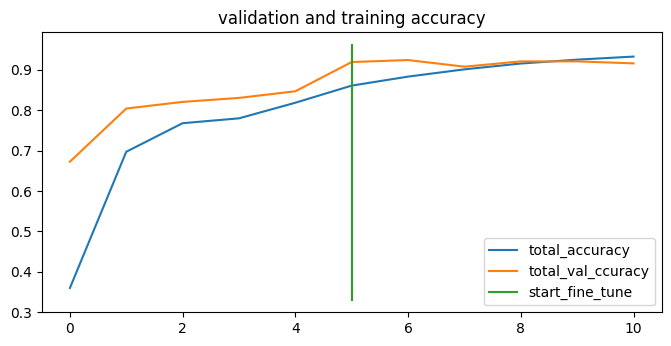

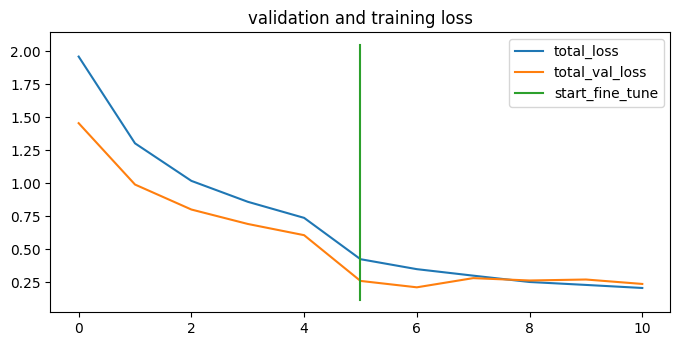

In [80]:
compare_history(history_2,history_full)